# Project: Investigate a Dataset - TMDb movie data
By Eelke Brouwers

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

The dataset analyzed here is a movie dataset, which contains information about 10,000 movies (released between 1960 and 2015) collected from The Movie Database (TMDb). The table below provides an overview of the different variables available in the dataset:

Column number | Column name | Column description
--------------|-------------|-------------------
0|id|Unique number
1|imdb_id|Imdb number
2|popularity|Succesfulness of the movie
3|budget|Budget needed to create the movie. Currency unknown. 
4|revenue|Movie income. Currency unknown.
5|original_title|Original title of the movie
6|cast|Cast. May contain multiple values separated by pipe character.
7|homepage|Homepage
8|director|Director
9|tagline|Tagline
10|keywords|Keywords
11|overview|Summary description of the movie content
12|runtime|Length of the movie in minutes
13|genres|Genres. May contain multiple values separated by pipe character.
14|production_companies|Production company(ies). May contain multiple values separated by pipe character.
15|release_date|Release date
16|vote_count|Number of user ratings
17|vote_average|Average user rating
18|release_year|Year the movie was released
19|budget_adj|Shows the budget in terms of 2010 dollars, accounting for inflation over time.
20|revenue_adj|Shows the revenue in terms of 2010 dollars, accounting for inflation over time.

### RESEARCH QUESTIONS
The research questions discussed in this report are listed below. The analysis can be found in the section 'Exploratory Data Analysis', which follows after the data wrangling process. <br />
#### 1. Can the features budget, duration and genre predict the successfulness of a movie? 
#### 2. Did the release and budget of movies change between 1960 and 2015? 
#### 3. Did the top 5 most released movie genres change between 1960 and 2015? 
<br />


In [333]:
# import needed packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling
### Exploring data

In [334]:
# Load data and print out a few lines.
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [335]:
df.tail()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
10861,21,tt0060371,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,NaN,Bruce Brown,NaN,...,"The Endless Summer, by Bruce Brown, is one of ...",95,Documentary,Bruce Brown Films,6/15/66,11,7.4,1966,0.000000,0.0
10862,20379,tt0060472,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,NaN,John Frankenheimer,Cinerama sweeps YOU into a drama of speed and ...,...,Grand Prix driver Pete Aron is fired by his te...,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,12/21/66,20,5.7,1966,0.000000,0.0
10863,39768,tt0060161,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,NaN,Eldar Ryazanov,NaN,...,An insurance agent who moonlights as a carthie...,94,Mystery|Comedy,Mosfilm,1/1/66,11,6.5,1966,0.000000,0.0
10864,21449,tt0061177,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,NaN,Woody Allen,WOODY ALLEN STRIKES BACK!,...,"In comic Woody Allen's film debut, he took the...",80,Action|Comedy,Benedict Pictures Corp.,11/2/66,22,5.4,1966,0.000000,0.0
10865,22293,tt0060666,0.035919,19000,0,Manos: The Hands of Fate,Harold P. Warren|Tom Neyman|John Reynolds|Dian...,NaN,Harold P. Warren,It's Shocking! It's Beyond Your Imagination!,...,A family gets lost on the road and stumbles up...,74,Horror,Norm-Iris,11/15/66,15,1.5,1966,127642.279154,0.0


In [336]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [337]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Cleaning data

1. Remove duplicates<br />
2. Handle missing values<br />
3. Convert datatypes<br />   
4. Split rows containing multiple genres

In [338]:
# Copy the dataset for the data wrangling process
df_clean = df.copy()

#### DUPLICATES

In [339]:
# Check for duplicates
sum(df_clean.duplicated())

1

In [340]:
# View duplicated rows
df_clean[df_clean.duplicated(keep=False)]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2089,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [341]:
# Delete duplicates 
df_clean.drop_duplicates(inplace=True)
# Check whether duplicated row is deleted
sum(df_clean.duplicated())

0

#### MISSING VALUES

In [342]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

> The data set contains a lot of missing values, mostly in the 'homepage' column. Delete all rows with a missing value would significantly downsize the dataset. In the coming code blocks the ratio of missing data per column is analyzed.

In [343]:
# Total number of missing values
df_clean.isnull().any(axis=1).sum()

8873

In [344]:
# Mean of missing values per column
df_clean.isnull().mean()

id                      0.000000
imdb_id                 0.000920
popularity              0.000000
budget                  0.000000
revenue                 0.000000
original_title          0.000000
cast                    0.006995
homepage                0.729775
director                0.004050
tagline                 0.259917
keywords                0.137414
overview                0.000368
runtime                 0.000000
genres                  0.002117
production_companies    0.094800
release_date            0.000000
vote_count              0.000000
vote_average            0.000000
release_year            0.000000
budget_adj              0.000000
revenue_adj             0.000000
dtype: float64

> The columns with a high ratio of missing values (homepage, tagline and keywords) are not included in further analysis and therefor those column will not be taking into consideration when deleting rows with missing values. The production companies column also contains relatively many missing data, but will nevertheless kept in as of interest for future analysis. 

In [345]:
# Get columns for which rows with missing values will be dropped
df_clean.columns[df_clean.isnull().mean() < 0.13]

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [346]:
# Drop rows with a missing values in one of the listed columns
df_clean = df_clean.dropna(subset=['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj'])

In [347]:
# Check whether missing values have been deleted from the dataset
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9770 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9770 non-null   int64  
 1   imdb_id               9770 non-null   object 
 2   popularity            9770 non-null   float64
 3   budget                9770 non-null   int64  
 4   revenue               9770 non-null   int64  
 5   original_title        9770 non-null   object 
 6   cast                  9770 non-null   object 
 7   homepage              2637 non-null   object 
 8   director              9770 non-null   object 
 9   tagline               7634 non-null   object 
 10  keywords              8664 non-null   object 
 11  overview              9770 non-null   object 
 12  runtime               9770 non-null   int64  
 13  genres                9770 non-null   object 
 14  production_companies  9770 non-null   object 
 15  release_date        

In [348]:
# Replace zero values in budget with NaN
df_clean = df_clean.astype({'budget': 'int', 'budget_adj': 'int'})
df_clean['budget'].replace({0:np.nan}, inplace=True)
df_clean['budget_adj'].replace({0:np.nan}, inplace=True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9770 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    9770 non-null   int64  
 1   imdb_id               9770 non-null   object 
 2   popularity            9770 non-null   float64
 3   budget                5021 non-null   float64
 4   revenue               9770 non-null   int64  
 5   original_title        9770 non-null   object 
 6   cast                  9770 non-null   object 
 7   homepage              2637 non-null   object 
 8   director              9770 non-null   object 
 9   tagline               7634 non-null   object 
 10  keywords              8664 non-null   object 
 11  overview              9770 non-null   object 
 12  runtime               9770 non-null   int64  
 13  genres                9770 non-null   object 
 14  production_companies  9770 non-null   object 
 15  release_date        

> As the budget column is used for analysis all rows with a missing budget value will be discarded, including the zero values (https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). 

In [349]:
# Drop all rows with missing budget and convert budget columns to int type
df_clean = df_clean.dropna(subset={'budget', 'budget_adj'})
# Check whether rows were deleted
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5019 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    5019 non-null   int64  
 1   imdb_id               5019 non-null   object 
 2   popularity            5019 non-null   float64
 3   budget                5019 non-null   float64
 4   revenue               5019 non-null   int64  
 5   original_title        5019 non-null   object 
 6   cast                  5019 non-null   object 
 7   homepage              1654 non-null   object 
 8   director              5019 non-null   object 
 9   tagline               4469 non-null   object 
 10  keywords              4724 non-null   object 
 11  overview              5019 non-null   object 
 12  runtime               5019 non-null   int64  
 13  genres                5019 non-null   object 
 14  production_companies  5019 non-null   object 
 15  release_date        

#### CONVERT DATA TYPES

Columns to convert:
- Budget from float to int
- Release_date from object to datetime 

In [350]:
# Convert budget column to int
df_clean = df_clean.astype({'budget': 'int'})

In [351]:
# Convert release_date from object to datetime 
import datetime
converted_date = []
for x in df_clean['release_date']:
    date = datetime.datetime.strptime(x, '%m/%d/%y')
    # The origin of datetime is 1970-01-01, which means that 2-digit year notations below 70 are converted to the year 2000 instead of 1900
    # (e.g. 66 becomes 2066 instead of 1966)
    # The code below fixes this by reducing these cases with 100 years
    if date.year > 2015:
        date = date.replace(year=date.year-100)
        date = date.strftime('%Y-%m-%d')
    else:
        date = date.strftime('%Y-%m-%d')
    converted_date.append(date)
converted_date = np.array(converted_date)

In [352]:
# Add the converted release dates to the dataframe
df_clean['release_date'] = converted_date.tolist()

# Convert release_date column from object to datetime
df_clean['release_date'] = pd.to_datetime(df_clean['release_date'])

# Check whether data conversion was succesfull
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5019 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    5019 non-null   int64         
 1   imdb_id               5019 non-null   object        
 2   popularity            5019 non-null   float64       
 3   budget                5019 non-null   int64         
 4   revenue               5019 non-null   int64         
 5   original_title        5019 non-null   object        
 6   cast                  5019 non-null   object        
 7   homepage              1654 non-null   object        
 8   director              5019 non-null   object        
 9   tagline               4469 non-null   object        
 10  keywords              4724 non-null   object        
 11  overview              5019 non-null   object        
 12  runtime               5019 non-null   int64         
 13  genres           

In [353]:
# Check whether the most recent date in release_date does not exceed the year 2015
df_clean['release_date'].sort_values(ascending=False)

144     2015-12-30
5       2015-12-25
15      2015-12-25
91      2015-12-25
53      2015-12-24
           ...    
10146   1960-08-17
10141   1960-08-14
10167   1960-07-01
10153   1960-06-21
10144   1960-06-15
Name: release_date, Length: 5019, dtype: datetime64[ns]

#### SPLIT COLUMNS

Split the cells containing multiple genres. 

In [354]:
# Split cells containing multiple genres 
df_clean = df_clean.assign(genres=df_clean.genres.str.split('|')).explode('genres').reset_index(drop=True)
df_clean.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.0,1.392446e+09
1,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.0,1.392446e+09
2,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.0,1.392446e+09
3,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.0,1.392446e+09
4,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.0,3.481613e+08


> Reference for used code: https://pandas.pydata.org/pandas-docs/stable/whatsnew/v0.25.0.html#series-explode-to-split-list-like-values-to-rows

In [355]:
# save file
df_clean.to_csv('tmdb-movies-clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

#### PART 1: Visual inspection of the data
Visual inspection of the data distribution of columns: popularity, budget, revenue and runtime

#### PART 2: Research questions
RQs addressed in this section:
1. Can the features budget, duration and genre predict the successfulness of a movie? 
2. Did the release and budget of movies change between 1960 and 2015? 
3. Did the top 5 most released movie genres change between 1960 and 2015? 

#### PART 1

In [356]:
# Get descriptive statistics
df_clean[['popularity','budget_adj','revenue_adj','runtime']].describe()

,popularity,budget_adj,revenue_adj,runtime
count,13252.000000,1.325200e+04,1.325200e+04,13252.000000
mean,1.079616,4.260780e+07,1.178828e+08,108.053350
std,1.467187,4.526482e+07,2.144701e+08,23.482759
min,0.002514,1.000000e+00,0.000000e+00,0.000000
25%,0.381060,1.040710e+07,1.437022e+05,94.000000
50%,0.673425,2.763273e+07,3.584338e+07,104.000000
75%,1.242498,5.949180e+07,1.376364e+08,118.000000
max,32.985763,4.250000e+08,2.827124e+09,540.000000


Text(0.5, 1.0, 'Boxplot Runtime')

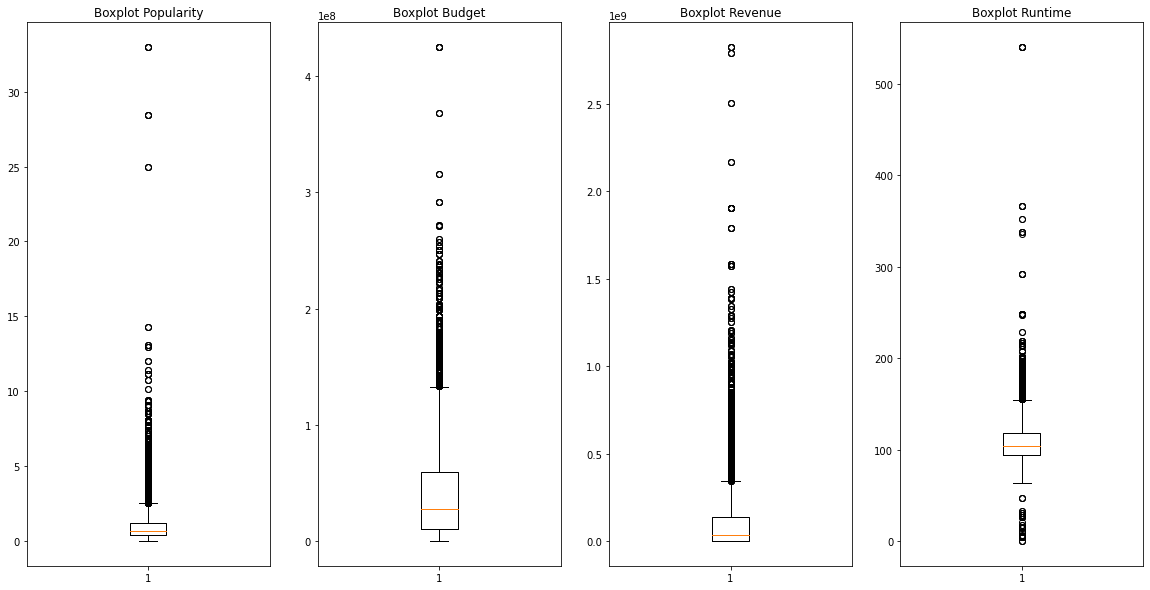

In [357]:
# Create boxplots of popularity, budget, revenue and runtime
fig, axs = plt.subplots(1, 4, figsize=(20,10))
axs[0].boxplot(df_clean['popularity'])
axs[0].set_title('Boxplot Popularity')
axs[1].boxplot(df_clean['budget_adj'])
axs[1].set_title('Boxplot Budget')
axs[2].boxplot(df_clean['revenue_adj'])
axs[2].set_title('Boxplot Revenue')
axs[3].boxplot(df_clean['runtime'])
axs[3].set_title('Boxplot Runtime')

> All data are right-skewed. 
To keep in mind: <br /> - Possible outliers in all columns <br /> - "Zero" values present in revenue and runtime column. Do these represent missing values, inaccurate values or real values (although the last option is not possible for runtime)?

#### PART 2

#### RQ 1: Can the movie features budget, duration and genre predict the successfulness of a movie? 

**1.1 BUDGET versus POPULARITY**

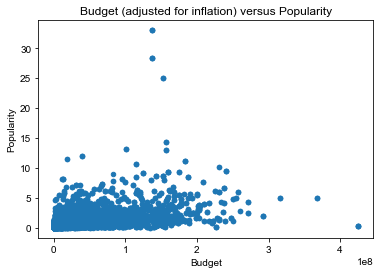

In [358]:
# Scatterplot budget (adjusted for inflation) and popularity
plt.scatter(x=df_clean.budget_adj, y=df_clean.popularity, s=20)
plt.title("Budget (adjusted for inflation) versus Popularity")
plt.xlabel("Budget")
plt.ylabel("Popularity")
plt.style.use("seaborn")

In [359]:
# Return movies with a popularity above 20
df_clean[df_clean['popularity'] > 20]['original_title'].unique()

array(['Jurassic World', 'Mad Max: Fury Road', 'Interstellar'],
      dtype=object)

In [360]:
# Select rows with a small budget
small_budget = df_clean[df_clean['budget_adj']< (df_clean['budget_adj'].median())]
# Select rows with a big budget
big_budget = df_clean[df_clean['budget_adj']>= (df_clean['budget_adj'].median())]

# Check whether these queries included each sample exactly once
num_samples = df_clean.shape[0]
num_samples == small_budget['popularity'].count() + big_budget['popularity'].count()

True

In [361]:
# Mean popularity for small and big budget
mean_small_budget = small_budget['popularity'].mean()
mean_big_budget = big_budget['popularity'].mean()
print(mean_small_budget, mean_big_budget)

0.672114432844839 1.486257570179403


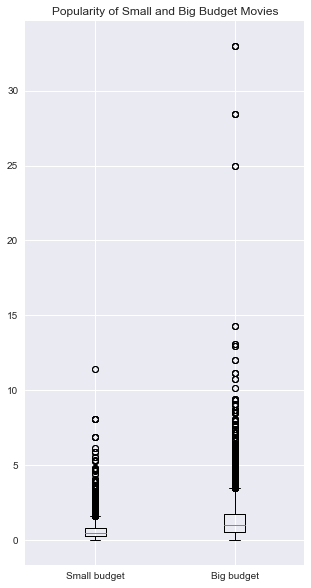

In [362]:
# Plot data
pop_small_budget = small_budget['popularity']
pop_big_budget = big_budget['popularity']
fig = plt.figure(figsize =(5, 10))
plt.boxplot([pop_small_budget, pop_big_budget])
plt.title('Popularity of Small and Big Budget Movies')
plt.xticks([1,2],['Small budget', 'Big budget'])
plt.grid(visible=True)

>  The plots insinuate a weak positive correlation between budget and popularity, with big budget movies being on average more popular. The three movies that are exceedingly popular are Jurassic World, Mad Max: Fury Road, and Instellar. 

**1.2 GENRE versus POPULARITY**

In [363]:
# Create function for a bargraph of two variables with variable genre on the x-axis and the function argument as variable on the y-axis
def bargraph_genre(var):
    if var:
        data = df_clean.groupby('genres')[var].mean().sort_values(ascending=False)
    else:
        data = df_clean['genres'].value_counts()
    ind = np.arange(len(data))
    width = 0.5
    plt.bar(ind, data, width)
    locations = ind 
    labels = data.index.values
    plt.xticks(locations, labels, rotation=90)

Text(0.5, 1.0, 'Popularity of different movie genres')

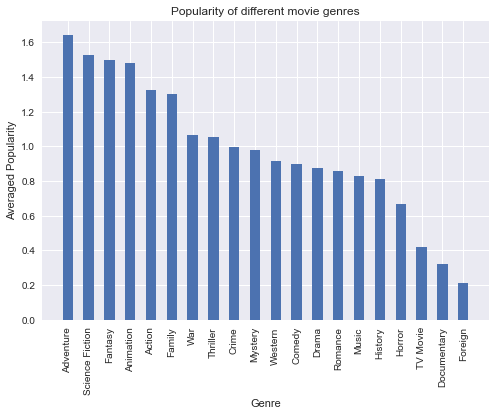

In [364]:
# Plot the popularity of the different movie genres in ascending order 
bargraph_genre('popularity')

# Define labels
plt.xlabel("Genre")
plt.ylabel("Averaged Popularity")
plt.title("Popularity of different movie genres")

Text(0.5, 1.0, 'Number of released movies per genre')

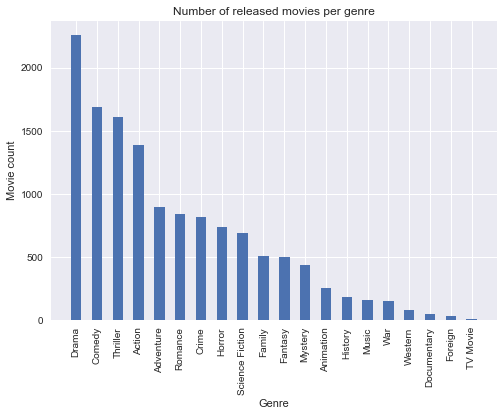

In [365]:
# Plot the number of released movies per genre 
bargraph_genre('')

# Define labels
plt.xlabel("Genre")
plt.ylabel("Movie count")
plt.title("Number of released movies per genre")

Text(0.5, 1.0, 'Average Movie Budget per Genre')

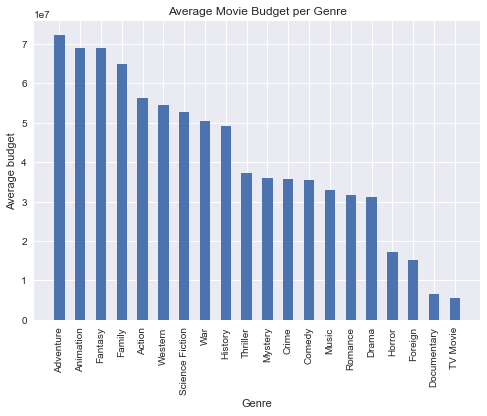

In [366]:
# Plot the average movie budget per genre
bargraph_genre('budget_adj')

# Define labels
plt.xlabel("Genre")
plt.ylabel("Average budget")
plt.title("Average Movie Budget per Genre")

Text(0.5, 1.0, 'Average Movie Revenue per Genre')

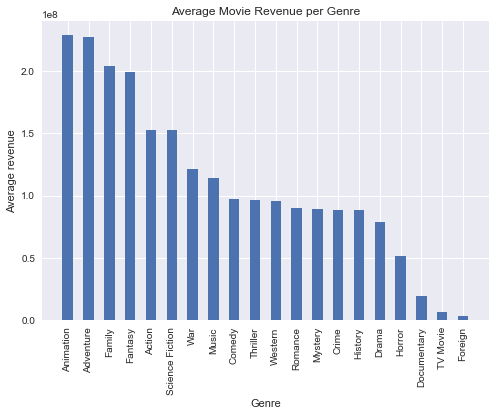

In [367]:
# Plot the average movie revenue per genre
bargraph_genre('revenue_adj')

# Define labels
plt.xlabel("Genre")
plt.ylabel("Average revenue")
plt.title("Average Movie Revenue per Genre")

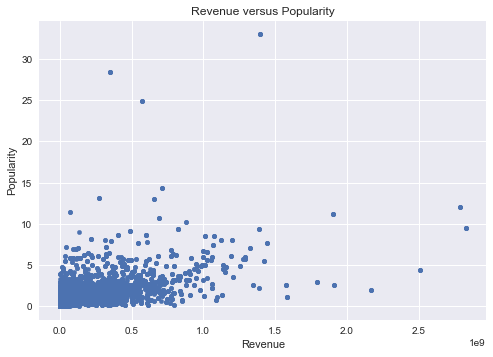

In [368]:
# Scatterplot of revenue (adjusted for inflation) versus popularity
plt.scatter(x=df_clean.revenue_adj, y=df_clean.popularity, s=20)
plt.title("Revenue versus Popularity")
plt.xlabel("Revenue")
plt.ylabel("Popularity")
plt.style.use("seaborn")

In [369]:
# Get the median of popularity
pop_median = df_clean['popularity'].median()

In [370]:
# Select rows with a low popularity
low_pop = df_clean[df_clean['popularity']<pop_median]
# Select rows with a high popularity
high_pop = df_clean[df_clean['popularity']>=pop_median]

# Check whether these queries included each sample exactly once
num_samples = df_clean.shape[0]
num_samples == low_pop['revenue_adj'].count() + high_pop['revenue_adj'].count()

True

In [371]:
# Get the mean revenue for low and high popularity movies
low_pop_mean = low_pop['revenue_adj'].mean()
high_pop_mean = high_pop['revenue_adj'].mean()

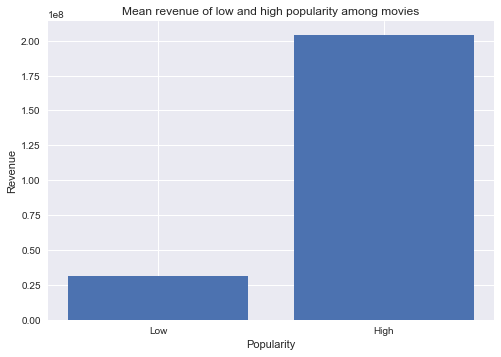

In [372]:
# Create bargraph of the mean revenue for low and high popularity movies
locations = [1, 2]
heights = [low_pop_mean, high_pop_mean]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Mean revenue of low and high popularity among movies')
plt.xlabel('Popularity')
plt.ylabel('Revenue');

> From the plots it seems that: <br />
> -The movie genre that has on average the highest popularity is _adventure_ <br />
> -The movie genre that is on average the most produced is _drama_ <br />
> -The movie genre with on average the highest budget is _adventure_ <br />
> -The movie genre with on average the highest revenue is _adventure_ <br />
> -The top 5 movie genres with the highest popularity, highest budget and highest revenue show a great overlap <br />
> -Revenue and popularity are positively correlated, with more popular movies having a higher revenue

Top 5|Highest popularity|Most produced|Highest budget|Highest revenue
-----|------------------|-------------|--------------|---------------
1|Adventure|Drama|Adventure|Adventure
2|Science Fiction|Comedy|Fantasy|Animation
3|Fantasy|Thriller|Animation|Family
4|Animation|Action|Family|Fantasy
5|Action|Adventure|Action|Science Fiction
*Table 2. Top 5 movie genres with ‘highest popularity’, ‘most produced’, ‘highest budget’, and 'highest revenue*


**1.3 RUNTIME versus POPULARITY**

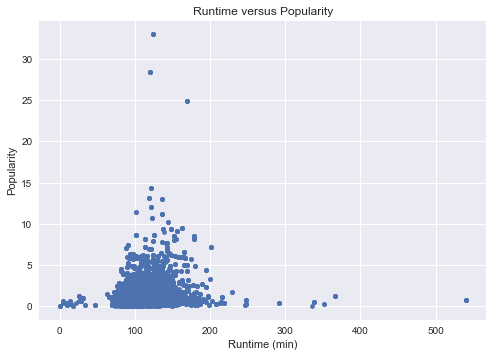

In [373]:
# Scatterplot movie runtime versus popularity
plt.scatter(x=df_clean.runtime, y=df_clean.popularity, s=20)
plt.title("Runtime versus Popularity")
plt.xlabel("Runtime (min)")
plt.ylabel("Popularity")
plt.style.use("seaborn")

In [374]:
# Create 4 runtime categories (lowest 25%, 25-50%, 50-75% and 75%-max) 
df_clean['runtime'].describe()

count    13252.000000
mean       108.053350
std         23.482759
min          0.000000
25%         94.000000
50%        104.000000
75%        118.000000
max        540.000000
Name: runtime, dtype: float64

In [375]:
# Get bin edges
minimum = df_clean['runtime'].min()
first_quantile = df_clean['runtime'].quantile(0.25)
median = df_clean['runtime'].median()
third_quantile = df_clean['runtime'].quantile(0.75)
maximum = df_clean['runtime'].max()

In [376]:
minimum, first_quantile, median, third_quantile, maximum

(0, 94.0, 104.0, 118.0, 540)

In [377]:
bin_edges = [minimum, first_quantile, median, third_quantile, maximum]
bin_names = ['short', 'short_middle', 'middle_long', 'long']
df_clean['runtime_class'] = pd.cut(df_clean['runtime'], bin_edges, labels=bin_names)
df_clean.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,runtime_class
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Action,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.0,1.392446e+09,long
1,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.0,1.392446e+09,long
2,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.0,1.392446e+09,long
3,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,137999939.0,1.392446e+09,long
4,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,137999939.0,3.481613e+08,long


In [378]:
# Mean popularity per runtime category
df_clean.groupby('runtime_class')['popularity'].mean()

runtime_class
short           0.772316
short_middle    0.864366
middle_long     1.084341
long            1.647678
Name: popularity, dtype: float64

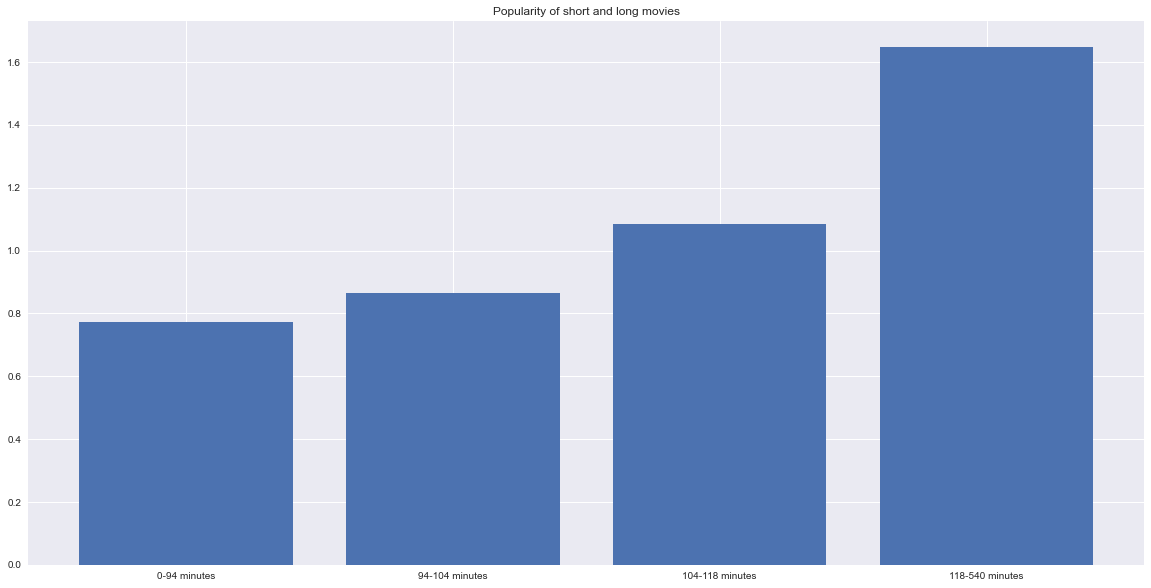

In [379]:
# Get popularity data for the different runtime categories
short_runtime = df_clean.popularity[df_clean['runtime_class']=='short'].mean()
short_middle_runtime = df_clean.popularity[df_clean['runtime_class']=='short_middle'].mean()
middle_long_runtime = df_clean.popularity[df_clean['runtime_class']=='middle_long'].mean()
long_runtime = df_clean.popularity[df_clean['runtime_class']=='long'].mean()

# Plot data
fig = plt.figure(figsize =(20, 10))
x = ['0-94 minutes', '94-104 minutes', '104-118 minutes', '118-540 minutes']
plt.bar(x, height = [short_runtime, short_middle_runtime, middle_long_runtime, long_runtime])
plt.title('Popularity of short and long movies')
plt.grid(visible=True)

> The plots suggest a non-linear correlation between runtime and popularity, with a higher popularity for movies lasting over 118 minutes than below, but again a lower popularity after 200 minutes. The bargraph is in that sense somewhat misleading, as the low popularity of the very long movies is averaged out by the high popularity of movies below 200 minutes, insinuating that the longer the movie, the more popular it is. The scatterplot shows this is not the case. From the scatterplot it also appears that low popularity movies exist among all durations. 

### RQ 2:  Did the release and budget of movies change between 1960 and 2015? 

Text(0.5, 1.0, 'Number of movies released per year')

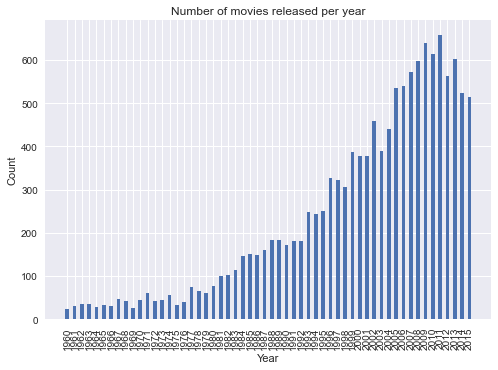

In [380]:
# Bargraph movie release year versus number of movies released
rel_count = df_clean.groupby('release_year')['id'].count()
ind = np.arange(len(rel_count))
width = 0.5
plt.bar(ind, rel_count, width)
locations = ind
labels = rel_count.index.values
plt.xticks(locations, labels, rotation=90)
plt.xlabel("Year")
plt.ylabel("Count")
plt.title("Number of movies released per year")

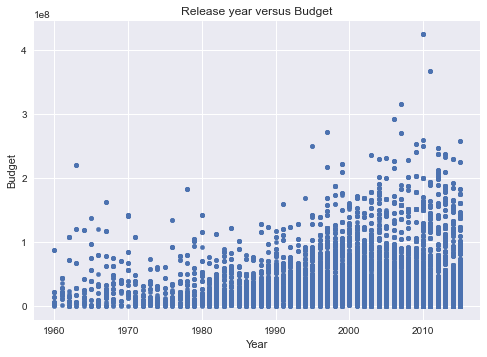

In [381]:
# Scatterplot movie release year versus budget (corrected for inflation)
plt.scatter(x=df_clean.release_year, y=df_clean.budget_adj, s=20)
plt.title("Release year versus Budget")
plt.xlabel("Year")
plt.ylabel("Budget")
plt.style.use("seaborn")

In [382]:
# Get descriptive statistics of release year
df_clean['release_year'].describe()

count    13252.000000
mean      2000.751736
std         11.792675
min       1960.000000
25%       1995.000000
50%       2004.000000
75%       2010.000000
max       2015.000000
Name: release_year, dtype: float64

> The first plot shows how the amount of movies release between from 1960 to 2015 has increased. Interestingly, there is seen a decrease after 2011. <br />
> The second plot suggests a positive correlation between release year and budget. In that case the average budget of movies has increased over time. Low budget movies are observed every year. 

### RQ 3:  Did the top 5 most released movie genres change between 1960 and 2015? 

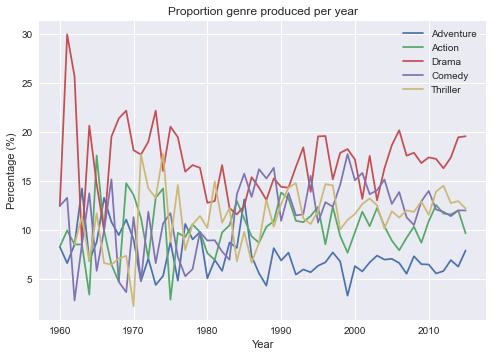

In [383]:
# Count movies produced per year
total = df_clean.groupby('release_year')['id'].count()

# Get movie count per year for different genres
df_clean_adventure = df_clean.query('genres == "Adventure"').groupby('release_year')['original_title'].count()
df_clean_action = df_clean.query('genres == "Action"').groupby('release_year')['original_title'].count()
df_clean_drama = df_clean.query('genres == "Drama"').groupby('release_year')['original_title'].count()
df_clean_comedy = df_clean.query('genres == "Comedy"').groupby('release_year')['original_title'].count()
df_clean_thriller = df_clean.query('genres == "Thriller"').groupby('release_year')['original_title'].count()

# Get proportions
adventure_perc_year = (df_clean_adventure/total)*100
action_perc_year = (df_clean_action/total)*100
drama_perc_year = (df_clean_drama/total)*100
comedy_perc_year = (df_clean_comedy/total)*100
thriller_perc_year = (df_clean_thriller/total)*100

xadventure = adventure_perc_year.index.values
xaction = action_perc_year.index.values
xdrama = drama_perc_year.index.values
xcomedy = comedy_perc_year.index.values
xthriller = thriller_perc_year.index.values

# Plot data
plt.xlabel("Year")
plt.ylabel("Percentage (%)")
plt.title("Proportion genre produced per year")
plt.plot(xadventure, adventure_perc_year)
plt.plot(xaction, action_perc_year)
plt.plot(xdrama, drama_perc_year)
plt.plot(xcomedy, comedy_perc_year)
plt.plot(xthriller, thriller_perc_year)
genres = ['Adventure', 'Action', 'Drama', 'Comedy', 'Thriller']
plt.legend(labels=genres)

>From the graph it appears that until 1990 the ranking of the top 5 most released movie genres is changing with the year, with the movie genre _drama_ overall being the most released genre. Between 1980 and 1990 the percentage released _comedy_ movies greatly increased to be temporarly higher then _drama_ movies. From 1990 the top 5 ranking begins to stabilize towards _drama_ movies as most release, followed by _thriller_ and _comedy_, then _action_ and finally _adventure_. <br />

<a id='conclusions'></a>
## Conclusion

In this report I explored the TMDB movie dataset, containing information about movies released between 1960 and 2015, and attempted to identify factors that may predict the succesfulness of a movie. The variables considered here are movie budget, genre and runtime. These variables were also analysed with regard to time, i.e. have movies changed over the years.

The popularity of a movie seems to be influenced by all three factors (budget, genre and runtime) tested. Movies with a bigger budget seem (on average) more popular, but the correlation is likely not very strong. Therefor, while budget on its own will probably not be able to predict the successfulness of a movie, it can be taken into account as one of several predicting variables. Likewise, shorter movies seem less popular than longer movies. But, the longer the movie the more popular does not hold true. At last, certain movie genres (adventure, science fiction, fantasy, animation, action) are associated with a higher popularity.   
Interestingly, the more popular movie genres are not the movie genres most released. A possible reason is the higher budget that is associated with more popular movie genres. Although the revenue of these movies is also higher on average, there is possibly a higher risk involved. In addition, their popularity might actually be explained by the fact that they are less produced and therefor more interesting and new when released, hence increasing popularity.  

Features that were not discussed here, but evenly interesting to consider when predicting the succesfulness of a movie are director, cast and production company. Combining different factors in one model will best predict a movie's popularity. 

Besides succesfulness of a movie I also looked into a time effect, i.e. have movies become more expensive and has the release of certain movie genres changed over the years. Not only have the number of released movies increased between 1960 and 2015, also the average budget of movies has rised. Interesting is the recent decrease in the number of movies released, occuring after 2011. One possible explanation for this reduction could be the economical crisis of 2008. Another reason might be that the cost-benefit reduces when the number of movies released increases and production companies therefor take on a new strategy. When interpreting the plot of movie budget and release year it is important to keep in mind that many movies were discarded because of missing budget values. It could be that this group represented mainly the older movies, which could give a somewhat distorted picture of the growth in films over the years. 

On average, the top 5 most released movie genres between 1960 and 2015 are _drama, comedy, thriller, action and adventure_. The order of this top 5 is mainly visible in recent years, with few fluctuations from year to year. In the early years (1960-1980) the order of the top 5 changed considerably between years, although drama movies, with only few exceptions, appear already then the most released movie genre. However, it cannot be excluded that one of the movie genres that were not taken into consideration here (the once not in the top 5 of all years combined), have in some years or during some period exceeded the proportion of released drama movies. 

To conclude, the three factors (budget, genre and runtime) that were studied to predict the succesfulness of a movie should all be taken into consideration when creating a prediction model. As for genre, carefulness should be taken as the populariy of a genre might be influenced by its rarity. Interestingly, when looking at recent years (2005-2015) the proportion of the different movie genres produced appears rather stable. Over time, the number of released movies and the budget of movies have increased, with a small decrease in the number of released movies after 2011. 

**Limitations** <br />
Important things to take into consideration when drawing conclusions from the analysis presented in this report are discussed below. <br />
-First of all, there has not been done any statistical analysis. The data were explored from different perspectives to get the most out of the data without stats. This makes the results suitable to get an idea on the data and possible relationships between the different variables, but not for drawing statistically substantiated conclusions. <br />
-Another limitation concerns the large amount of missing values in the dataset. For example, all records with a missing or zero budget were discarded. On the website where the data were collected from (https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata) it was unclear whether the zero values represent missing values or actual zero’s (which seems unliekly) and for that reason I decided to discard them. A limitation is that this might have led to the exclusion of a certain type of movie (e.g. low-budget movies). Low-budget (or sometimes referred to as no-budget movies) are made with a low or no budget (https://raindance.org/classic-top-10-no-budget-films/), assuming that no budget refers to no external budget. As a significant amount of movies contained a value of zero in the analyzed database it is worth looking into this in a next analysis. 
-The top 5 most release movie genres between 1960 and 2015 was chosen based on the overall top 5. It cannot be excluded that some movie genres that were not taken into account might have been in the top 5 during some period.

### REFERENCES
https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata <br />
https://raindance.org/classic-top-10-no-budget-films/ <br />
https://stackoverflow.com/ <br />
https://pandas.pydata.org/pandas-docs/stable/whatsnew/v0.25.0.html#series-explode-to-split-list-like-values-to-rows 
